Original article: https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c

Full Deep Learning pipeline:
* Exploring and processing data
* Building and training neural network
* visualization loss and accuracy
* adding regularization to neural network

# Exploring and Processing the Data
***
* We need to split our dataset into features and a label column
* We need to do normalization
* And then we split our features into a training, validation and test set

In [1]:
import pandas as pd

In [3]:
# read in the data
data = pd.read_csv("housepricedata.csv")
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


The columns:
* Lot area ( in sq ft )
* Overall quality ( 1-10 )
* Overall condition ( 1-10 )
* Total basement area ( in sq ft )
* Number of Full Bathrooms 
* Number of Half Bathrooms
* Number of Bedrooms above ground
* Total number fo rooms above ground
* Number of fireplaces
* Garage Area (in sq ft)

Target:
* Is house price above median or not? ( 1 - yes , 0 - no )

In [8]:
target = data.columns == "AboveMedianPrice"
data.loc[:,~target].head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,8450,7,5,856,2,1,3,8,0,548
1,9600,6,8,1262,2,0,3,6,1,460
2,11250,7,5,920,2,1,3,6,1,608
3,9550,7,5,756,1,0,3,7,1,642
4,14260,8,5,1145,2,1,4,9,1,836


In [10]:
# split data from target
X = data.loc[:,~target]
y = data.loc[:,target]

Split the Data Into Train, Test, and Validation

In [21]:
from sklearn.model_selection import train_test_split
# split into train and test
x_train, x_val_and_test , y_train, y_val_and_test = train_test_split( X , y , test_size=0.2 )
# split into val and test
x_val, x_test , y_val, y_test = train_test_split( x_val_and_test , y_val_and_test , 
                                                 test_size=0.5 )

Now normalize the data. You learn the normalization on the training data, and apply that transformation to the testing data

In [18]:
from sklearn.preprocessing import MinMaxScaler
# grab columns that are not the target
cols = data.loc[:,~target].columns
scaler = MinMaxScaler()
# fit the transformation on training data and transform it 
x_train = pd.DataFrame(scaler.fit_transform(x_train.values),columns=cols)
x_train.describe()

In [22]:
# transform the testing and validation data based on that transformation
x_val = pd.DataFrame(scaler.transform(x_val),columns=cols)
x_test = pd.DataFrame(scaler.transform(x_test),columns=cols)
x_val.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.042365,0.560122,0.525440,0.168800,0.529680,0.157534,0.346747,0.365297,0.182648,0.315416
std,0.045679,0.150988,0.165186,0.072178,0.177989,0.247424,0.094880,0.121949,0.211117,0.141751
min,0.000950,0.222222,0.142857,0.000000,0.333333,0.000000,0.125000,0.166667,0.000000,0.000000
25%,0.029667,0.444444,0.428571,0.126023,0.333333,0.000000,0.250000,0.250000,0.000000,0.217207
50%,0.035861,0.555556,0.428571,0.156956,0.666667,0.000000,0.375000,0.333333,0.000000,0.327574
75%,0.045465,0.666667,0.571429,0.213011,0.666667,0.500000,0.375000,0.416667,0.333333,0.405677
max,0.531754,1.000000,1.000000,0.506383,1.000000,1.000000,0.625000,0.750000,0.666667,0.620592


Well, we should probably one-hot encode all of the categorical columns, and we should not normalize categorical ones, and only the numerical ones. 

I should select numerical ones, and do the normalization on that, and then I should perform the one-hot encoding separately for the categorical ones and then just merge the dataframes at the end

In [23]:
print(x_train.shape,x_val.shape,x_test.shape)

(1168, 10) (146, 10) (146, 10)


# Setting up the Architecture of the Neural Net
***
Suppose we want a neural network with an input layer of 10 nodes, a hidden layer of 32 nodes, another hidden layer of 32 nodes, and then an output layer consisting of a single node. This means we'll want to have these layers:

* Hidden layer 1 : 32 neurons, ReLU activation
* Hidden layer 2: 32 neurons, ReLU activation
* Output layer: 1 neuron, Sigmoid Activation

Now we need to describe this architecture to Keras. We will use the sequential model, which means we just describe the above layers in sequence. 

In [24]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [25]:
# specify keras model:
model = Sequential( [ 
    Dense( 32 , activation='relu', input_shape=(10,)),
    Dense( 32 , activation='relu' ),
    Dense( 1  , activation='sigmoid' ),
])

# note that we specify the input layer shape on the first layer
# dense refers to a fully-connected layer
# we do not put input shape on the second layer because keras infers it from the output
# of the first layer
# our third layer is a dense layer with 1 nueron and sigmoid activation

# Filling in the Best Numbers
***
Now we need to find the best numbers for it. We need to configure the model by telling it which optimization algorithm to use, which loss function to use, and what other metrics you want to track apart from the loss function. We do this using the ```model.compile``` method. 

Optimizer means we want minibatch gradient descent.

Binary crosstentropy loss means the loss function for outputs that take the values 1 or 0

Metrics accuracy means we want tot rack accuracy on top of the loss function. 

In [26]:
model.compile( optimizer='sgd' , 
             loss='binary_crossentropy',
             metrics=['accuracy'])

Now, we train

In [27]:
# this outputs a history, which well save as hist
hist = model.fit( x_train , y_train , 
                batch_size=32, epochs=100 ,
                validation_data = (x_val , y_val))

Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 1s 468us/step - loss: 0.6948 - acc: 0.4777 - val_loss: 0.6886 - val_acc: 0.5753
Epoch 2/100
1168/1168 [==============================] - 0s 71us/step - loss: 0.6863 - acc: 0.6036 - val_loss: 0.6814 - val_acc: 0.7466
Epoch 3/100
1168/1168 [==============================] - 0s 74us/step - loss: 0.6783 - acc: 0.7466 - val_loss: 0.6733 - val_acc: 0.7808
Epoch 4/100
1168/1168 [==============================] - 0s 71us/step - loss: 0.6701 - acc: 0.7842 - val_loss: 0.6649 - val_acc: 0.8219
Epoch 5/100
1168/1168 [==============================] - 0s 84us/step - loss: 0.6624 - acc: 0.8202 - val_loss: 0.6575 - val_acc: 0.8356
Epoch 6/100
1168/1168 [==============================] - 0s 128us/step - loss: 0.6553 - acc: 0.8330 - val_loss: 0.6503 - val_acc: 0.8425
Epoch 7/100
1168/1168 [==============================] - 0s 89us/step - loss: 0.6483 - acc: 0.8382 - val_loss: 0.6431 - val_acc: 0.8562

Now we can evaluate our model on the test set:

In [29]:
# returns (loss, accuracy)
model.evaluate( x_test , y_test )

146/146 [==============================] - 0s 132us/step


[0.34523385722343236, 0.8561643811121379]

## Summary
***
1. Specify architecture using keras sequential model with dense layers
2. Compile the model with optimizer, loss function, and metric
3. train your model with model.fit
4. then evaluate the model with model.evaluate

# Visualizing Loss and Accuracy
***
How do we know if the model is overfitting?
Plot the training loss and the validation loss over the number of epochs passed.

In [33]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)

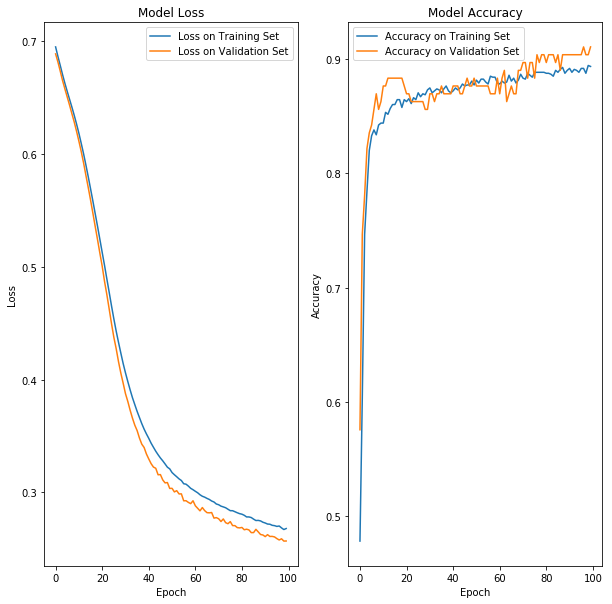

In [36]:
fig,ax = plt.subplots(1,2)
ax[0].plot( hist.history['loss'] ,label='Loss on Training Set')
ax[0].plot( hist.history['val_loss'], label='Loss on Validation Set')
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot( hist.history['acc'] ,label='Accuracy on Training Set')
ax[1].plot( hist.history['val_acc'], label='Accuracy on Validation Set')
ax[1].set_title("Model Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()

# Adding Regularization to Neural Network
***
Let's create a new model with a regularization parameter.

## Overfitting Model
***
First, lets create a model that would have a serious overfitting problem and visualize its loss.

We'll just add more nodes and layers to create a more complex model which, for the same amount of data, should lead to more overfitting. 

In [38]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4437 - acc: 0.7911 - val_loss: 0.3124 - val_acc: 0.8562
Epoch 2/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.3305 - acc: 0.8656 - val_loss: 0.3544 - val_acc: 0.8014
Epoch 3/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.3168 - acc: 0.8733 - val_loss: 0.2945 - val_acc: 0.8904
Epoch 4/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.3098 - acc: 0.8690 - val_loss: 0.2902 - val_acc: 0.8562
Epoch 5/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.2662 - acc: 0.8955 - val_loss: 0.2488 - val_acc: 0.9041
Epoch 6/100
1168/1168 [==============================] - 2s 1ms/step - loss: 0.2577 - acc: 0.8938 - val_loss: 0.2835 - val_acc: 0.8836
Epoch 7/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.2598 - acc: 0.8921 - val_loss: 0.2656 - val_acc: 0.8973
Epoch 8/

Epoch 61/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1249 - acc: 0.9486 - val_loss: 0.3345 - val_acc: 0.9041
Epoch 62/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1251 - acc: 0.9461 - val_loss: 0.4426 - val_acc: 0.8904
Epoch 63/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1356 - acc: 0.9495 - val_loss: 0.3175 - val_acc: 0.8973
Epoch 64/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1440 - acc: 0.9426 - val_loss: 0.3953 - val_acc: 0.8904
Epoch 65/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1744 - acc: 0.9229 - val_loss: 0.2948 - val_acc: 0.8836
Epoch 66/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1386 - acc: 0.9435 - val_loss: 0.3369 - val_acc: 0.8973
Epoch 67/100
1168/1168 [==============================] - 1s 1ms/step - loss: 0.1313 - acc: 0.9461 - val_loss: 0.4224 - val_acc: 0.8630
Epoch 68/100
1168/1168 [========================

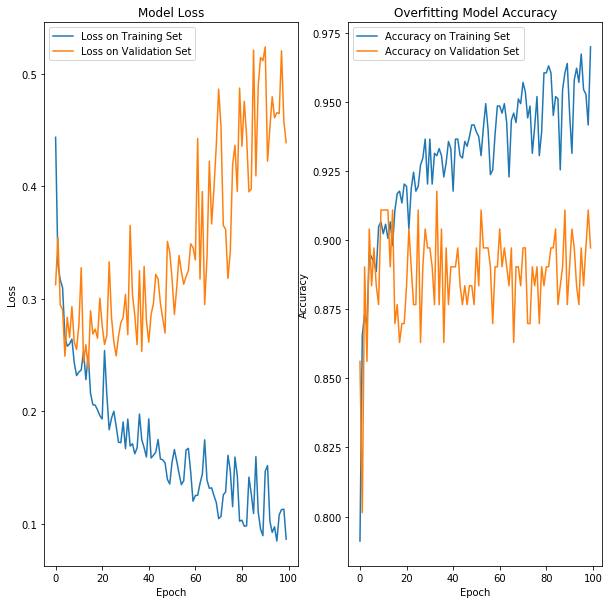

In [46]:
fig,ax = plt.subplots(1,2)
ax[0].plot( hist_2.history['loss'] ,label='Loss on Training Set')
ax[0].plot( hist_2.history['val_loss'], label='Loss on Validation Set')
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot( hist_2.history['acc'] ,label='Accuracy on Training Set')
ax[1].plot( hist_2.history['val_acc'], label='Accuracy on Validation Set')
ax[1].set_title("Overfitting Model Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()

## Regularized Model
***
This clearly shows overfitting, with the training loss decreasing, but the validation loss staying way above the training loss and increasing.

There are three main strategies to implement regularization. L2 regularization, dropout and early stopping. We're not going to do early stopping because after we've done the first two strategies, the validation loss doesn't take the U-shape

In [41]:
from keras.layers import Dropout
from keras import regularizers

In [43]:
l2_reg = 0.01
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg)),
])

To add L2 regularization, we add the kwarg kernel_regularizer in each of the dense layers.

To add dropout, we add new layers in between the dense layers ```Dense(0.3)```, which means that the neurons in the previous layer have a probability of 0.3 in dropping out during training. 

Now lets compile and fit

In [44]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(x_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(x_val, y_val))

Train on 1168 samples, validate on 146 samples
Epoch 1/100
1168/1168 [==============================] - 3s 3ms/step - loss: 12.9057 - acc: 0.6635 - val_loss: 2.7000 - val_acc: 0.8151
Epoch 2/100
1168/1168 [==============================] - 2s 2ms/step - loss: 1.1783 - acc: 0.8459 - val_loss: 0.5746 - val_acc: 0.8699
Epoch 3/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.5314 - acc: 0.8716 - val_loss: 0.5281 - val_acc: 0.8425
Epoch 4/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4910 - acc: 0.8716 - val_loss: 0.4560 - val_acc: 0.9041
Epoch 5/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.5334 - acc: 0.8467 - val_loss: 0.5259 - val_acc: 0.8630
Epoch 6/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4941 - acc: 0.8699 - val_loss: 0.4458 - val_acc: 0.8973
Epoch 7/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4602 - acc: 0.8870 - val_loss: 0.5360 - val_acc: 0.8151
Epoch 8

Epoch 61/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4441 - acc: 0.8870 - val_loss: 0.4081 - val_acc: 0.8904
Epoch 62/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4490 - acc: 0.8784 - val_loss: 0.4128 - val_acc: 0.8904
Epoch 63/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4364 - acc: 0.8836 - val_loss: 0.4093 - val_acc: 0.8904
Epoch 64/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4416 - acc: 0.8861 - val_loss: 0.4449 - val_acc: 0.9041
Epoch 65/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4379 - acc: 0.8844 - val_loss: 0.4151 - val_acc: 0.8836
Epoch 66/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4263 - acc: 0.8844 - val_loss: 0.4046 - val_acc: 0.8973
Epoch 67/100
1168/1168 [==============================] - 2s 2ms/step - loss: 0.4161 - acc: 0.8921 - val_loss: 0.4058 - val_acc: 0.8904
Epoch 68/100
1168/1168 [========================

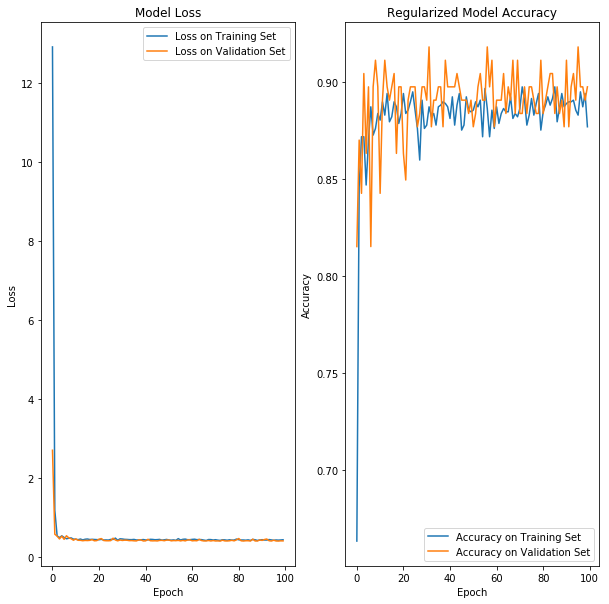

In [45]:
fig,ax = plt.subplots(1,2)
ax[0].plot( hist_3.history['loss'] ,label='Loss on Training Set')
ax[0].plot( hist_3.history['val_loss'], label='Loss on Validation Set')
ax[0].set_title("Model Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

ax[1].plot( hist_3.history['acc'] ,label='Accuracy on Training Set')
ax[1].plot( hist_3.history['val_acc'], label='Accuracy on Validation Set')
ax[1].set_title("Regularized Model Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
plt.show()

# Summary
***
* Explore and Process the Data
* Build and Train Neural Network
* Visualize Loss and Accuracy
* Add regularization to neural network